# Causality Analysis of the Lalonde Dataset

## 1. Introduction and Motivation



In [2]:
# Import packages
from itertools import permutations

import conditional_independence
import hyppo
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pingouin as pg

np.random.seed(2)

In [3]:
df = pd.read_csv('lalonde_data.csv')
df.head()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
0,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,9930.0460
1,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,3595.8940
2,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,24909.4500
3,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,7506.1460
4,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,289.7899


In [4]:
df.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,0.411357,24.520776,10.267313,0.800554,0.105263,0.162050,0.779778,3042.896575,5454.635848
std,0.492421,6.625947,1.704774,0.399861,0.307105,0.368752,0.414683,5066.143366,6252.943422
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,936.307950,3951.889000
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3993.207000,8772.004250
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660000,60307.930000


In [5]:
# WARNING:
# The installation takes a few minutes.
# Only run during the first time running this notebook and if you don't have these packages installed.
# Run in terminal command line instead if it does not work.

#!pip install hyppo
#!pip install pingouin
#!pip install conditional_independence

## Basic stats
### Distributions

/home/vincent/miniconda3/envs/causality/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


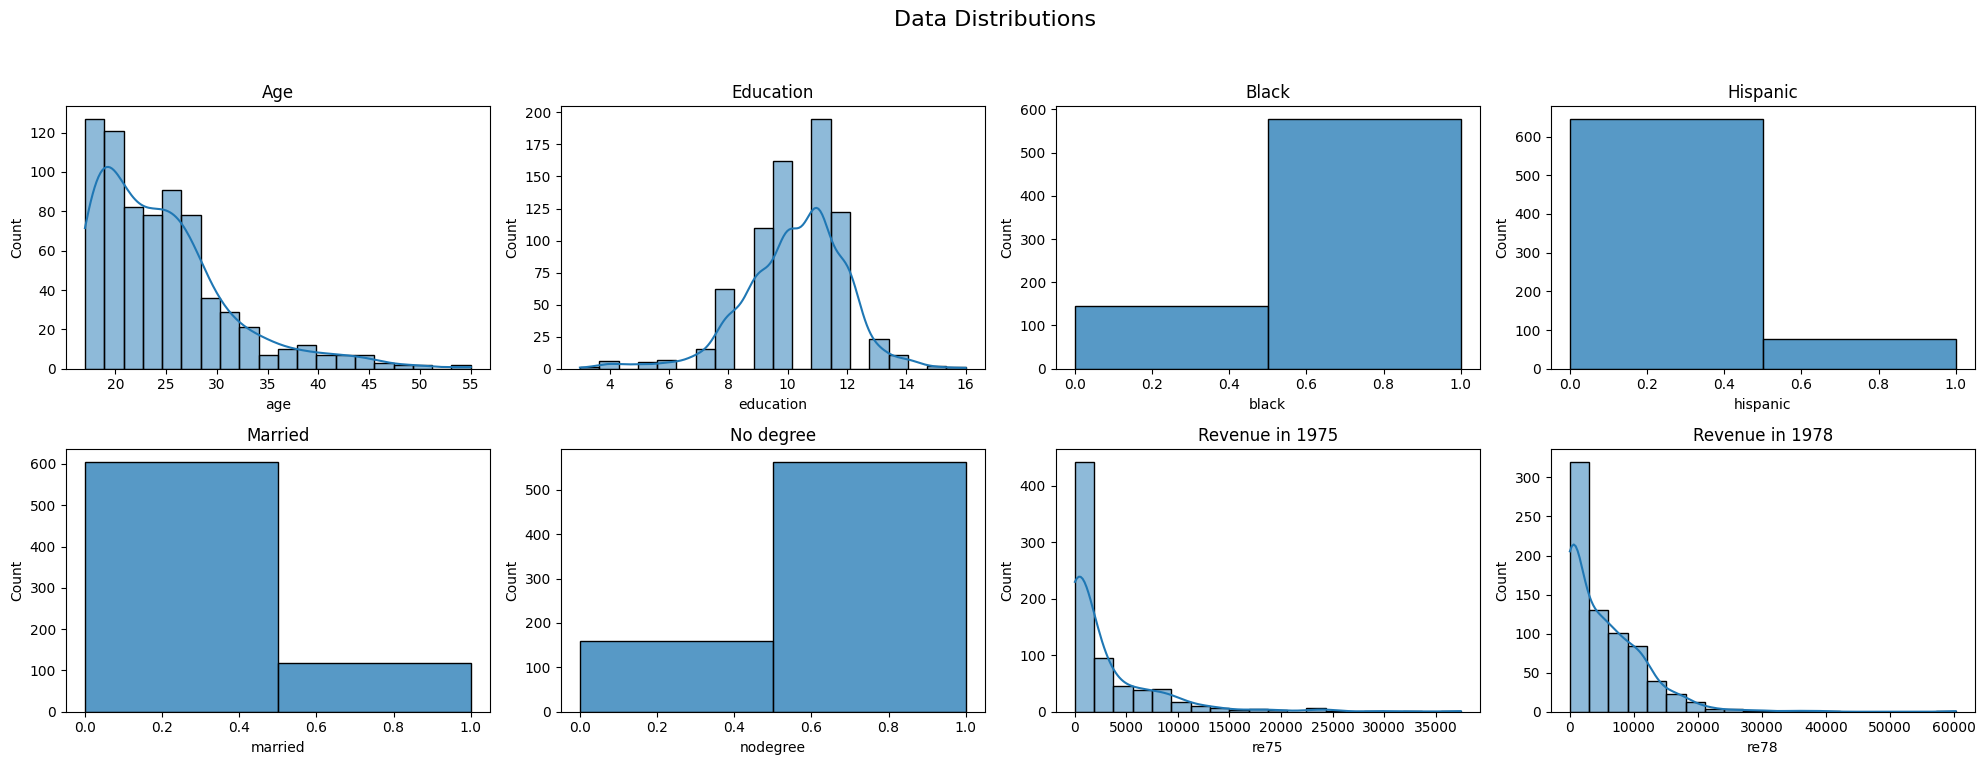

In [6]:
import seaborn as sns

# Setting up the visualizations layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
fig.suptitle("Data Distributions", fontsize=16)

# Histograms for key variables
sns.histplot(df["age"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age")

sns.histplot(df["education"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Education")

sns.histplot(df["black"], bins=2, kde=False, ax=axes[0, 2])
axes[0, 2].set_title("Black")

sns.histplot(df["hispanic"], bins=2, kde=False, ax=axes[0, 3])
axes[0, 3].set_title("Hispanic")

sns.histplot(df["married"], bins=2, kde=False, ax=axes[1, 0])
axes[1, 0].set_title("Married")

sns.histplot(df["nodegree"], bins=2, kde=False, ax=axes[1, 1])
axes[1, 1].set_title("No degree")

sns.histplot(df["re75"], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Revenue in 1975")

sns.histplot(df["re78"], bins=20, kde=True, ax=axes[1, 3])
axes[1, 3].set_title("Revenue in 1978")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

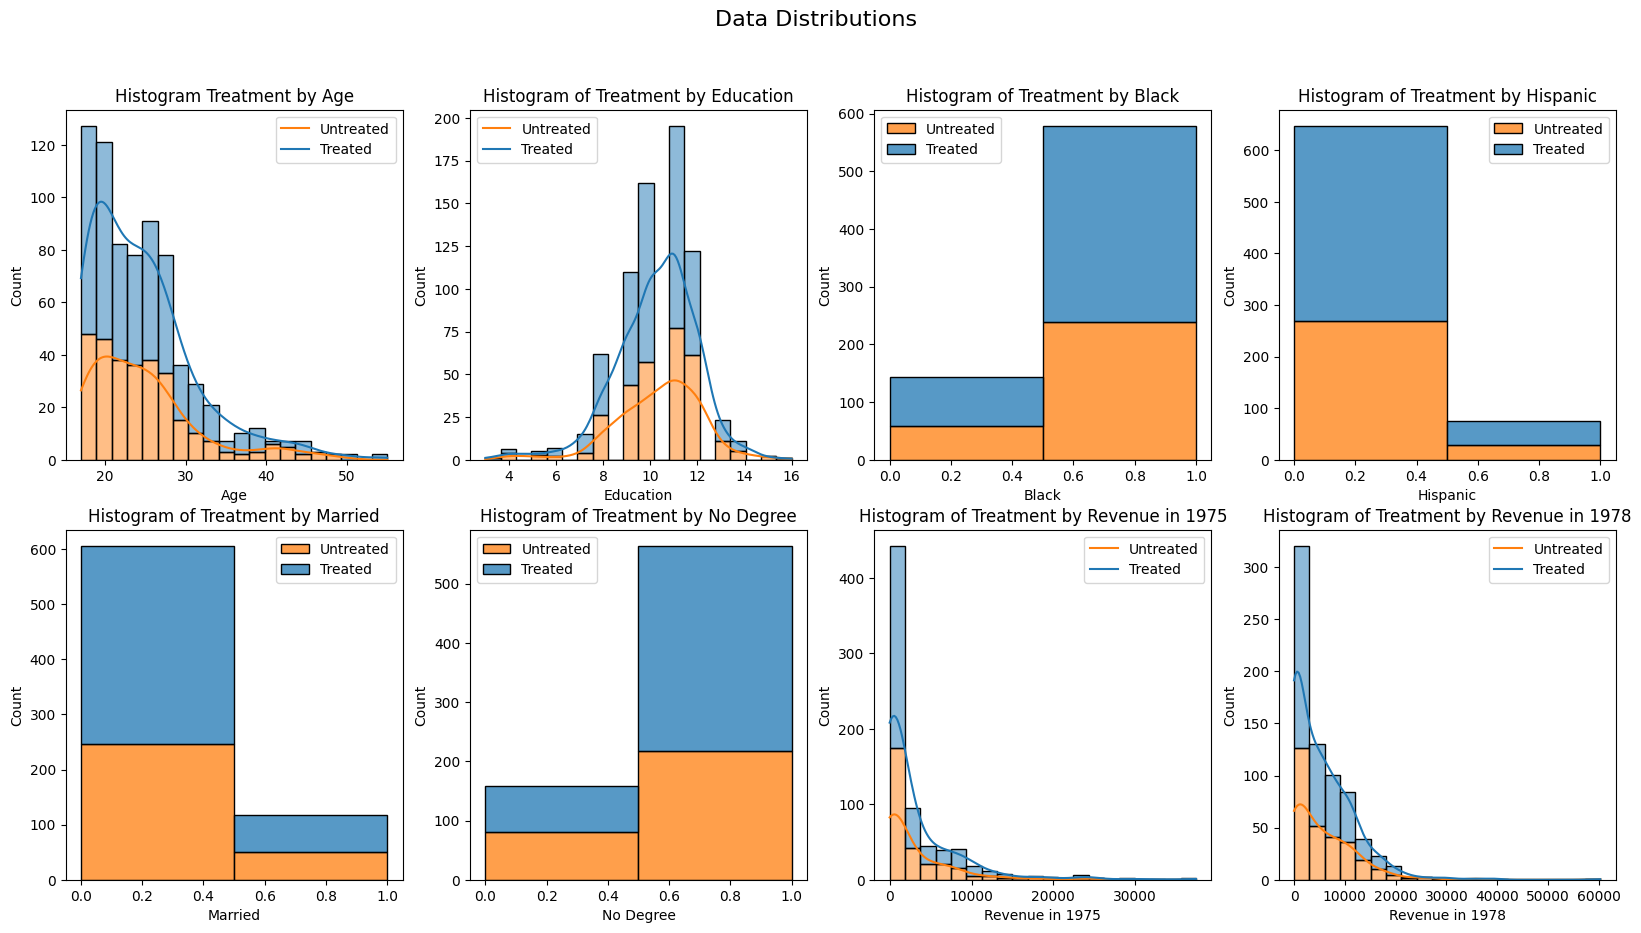

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle("Data Distributions", fontsize=16)

sns.histplot(
    data=df,
    x="age",
    hue="treat",
    multiple="stack",
    bins=20,
    kde=True,
    ax=axes[0, 0],
)
axes[0, 0].set_title("Histogram Treatment by Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(labels=["Untreated", "Treated"])


sns.histplot(
    data=df,
    x="education",
    hue="treat",
    multiple="stack",
    bins=20,
    kde=True,
    ax=axes[0, 1],
)
axes[0, 1].set_title("Histogram of Treatment by Education")
axes[0, 1].set_xlabel("Education")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="black",
    hue="treat",
    multiple="stack",
    bins=2,
    kde=False,
    ax=axes[0, 2],
)
axes[0, 2].set_title("Histogram of Treatment by Black")
axes[0, 2].set_xlabel("Black")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="hispanic",
    hue="treat",
    multiple="stack",
    bins=2,
    kde=False,
    ax=axes[0, 3],
)
axes[0, 3].set_title("Histogram of Treatment by Hispanic")
axes[0, 3].set_xlabel("Hispanic")
axes[0, 3].set_ylabel("Count")
axes[0, 3].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="married",
    hue="treat",
    multiple="stack",
    bins=2,
    kde=False,
    ax=axes[1, 0],
)
axes[1, 0].set_title("Histogram of Treatment by Married")
axes[1, 0].set_xlabel("Married")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="nodegree",
    hue="treat",
    multiple="stack",
    bins=2,
    kde=False,
    ax=axes[1, 1],
)
axes[1, 1].set_title("Histogram of Treatment by No Degree")
axes[1, 1].set_xlabel("No Degree")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="re75",
    hue="treat",
    multiple="stack",
    bins=20,
    kde=True,
    ax=axes[1, 2],
)
axes[1, 2].set_title("Histogram of Treatment by Revenue in 1975")
axes[1, 2].set_xlabel("Revenue in 1975")
axes[1, 2].set_ylabel("Count")
axes[1, 2].legend(labels=["Untreated", "Treated"])

sns.histplot(
    data=df,
    x="re78",
    hue="treat",
    multiple="stack",
    bins=20,
    kde=True,
    ax=axes[1, 3],
)
axes[1, 3].set_title("Histogram of Treatment by Revenue in 1978")
axes[1, 3].set_xlabel("Revenue in 1978")
axes[1, 3].set_ylabel("Count")
axes[1, 3].legend(labels=["Untreated", "Treated"])




### Correlations

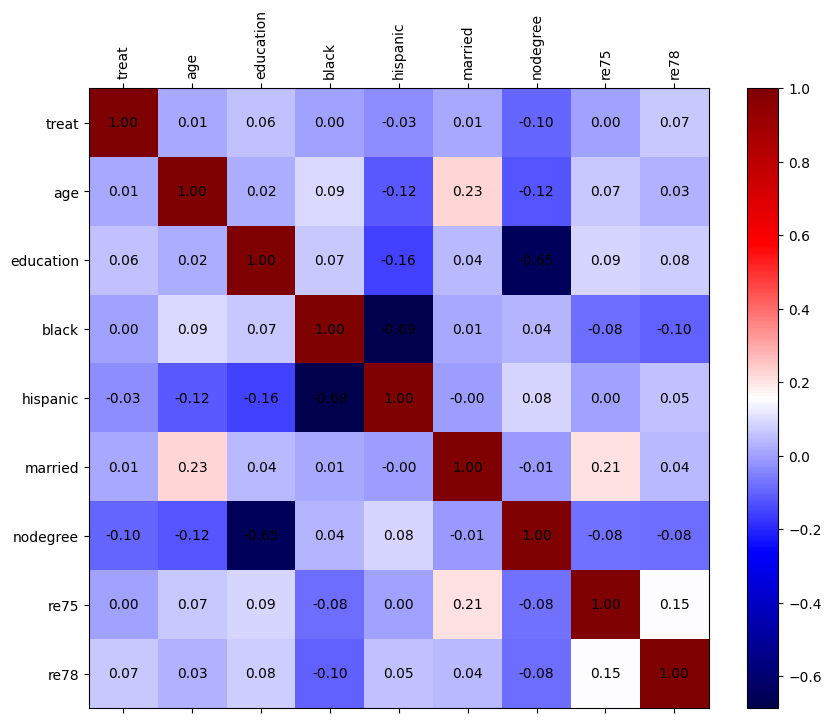

In [8]:
corr = df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(corr, fignum=1, cmap="seismic")
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")
plt.colorbar()
plt.show()

### Data distributions

## Independence testing

In [9]:
class ExplorationManager:
    """Takes care of exploratory analyses, including d-separation, visualisation and testing for independences."""

    def __init__(self, data, G=None):
        """
        :param data: data (df)
        :param G: the graph (a DiGraph object)
        """
        self.data = data
        self.G = G

    def is_d_separated(self, x, y, z):
        """
        Verifies whether two (sets of) variables are d-separated by a (set) of variables.

        :param x: a set of independent variable(s), len(x) > 0
        :param y: a set of dependent variable(s), len(y) > 0
        :param z: a set of conditioning variables, len(z) >= 0
        """
        return nx.algorithms.d_separated(G=self.G, x=x, y=y, z=z)

    def visualize_rel(self, x, y):
        """
        Visualizes the relationship between x and y.

        :param x: the independent variable
        :param y: the dependent variable
        """
        plt.scatter(self.data[x], self.data[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"Data distribution of {x} and {y}")
        plt.show()

    def is_dependent(self, x, y, z=[]):
        """
        Tests  whether two variables are dependent.
        By default tests for marginal dependence, if z (conditioning set)
        is specified, tests for conditional dependence.

        :param x: an independent variable (str)
        :param y: a dependent variable (str)
        :param z: conditioning set (list)

        Returns n, r, 95% CI and a p-value (df).
        """
        return pg.partial_corr(data=self.data, x=x, y=y, covar=z, method="pearson")

    def is_marginally_dependent(self, x, y):
        """
        Tests  whether two variables are marginally dependent.

        :param x: an independent variable (list/array)
        :param y: a dependent variable (list/array)

        Returns n, r, 95% CI and a p-value, BF10 and power (df).
        """
        return pg.corr(x=x, y=y, method="pearson")

    def is_hsic_dependent(self, x, y):
        """
        Tests the dependece of two variables using the Hilbert Schmidt Independence Criterion (Gretton et al, 2007).

        :param x: an independent variable (list/array)
        :param y: a dependent variable (list/array)

        Returns the hsic statistic and p-value (tuple).
        """
        hsic, p = hyppo.independence.Hsic().test(self.data[x], self.data[y])
        return hsic, p

    def test_all(self, variables, method="marginal"):
        """
        Tests dependence of all possible permutations of variables specified.
        By default tests for marginal dependence, if the method variable is changed,
        tests for conditional dependence.

        :param variables: all variables to consider (list)
        :param method: {'marginal', 'conditional', 'both'}

        Returns a dictionary of p-values.
        """
        dependence_tests = {}

        if method in ["marginal", "both"]:
            for var1, var2 in permutations(variables, 2):
                dependence_tests[var1, var2] = pg.partial_corr(
                    data=self.data, x=var1, y=var2, covar=[], method="pearson"
                )["p-val"].item()

        if method in ["conditional", "both"]:
            for var1, var2, cond in permutations(variables, 3):
                dependence_tests[var1, var2, cond] = pg.partial_corr(
                    data=self.data, x=var1, y=var2, covar=[cond], method="pearson"
                )["p-val"].item()

        return dependence_tests

    def test_all_hsic(self, variables, method="marginal"):
        """
        Tests dependence of all possible permutations of variables specified using HSIC (Gretton et al, 2007).

        :param variables: all variables to consider (list)

        Returns a dictionary of p-values.
        """
        dependence_tests = {}

        if method in ["marginal", "both"]:
            for var1, var2 in permutations(variables, 2):
                # print(var1, var2)
                dependence_tests[var1, var2] = conditional_independence.hsic_test(
                    np.stack((self.data[var1], self.data[var2]), axis=1),
                    i=0,
                    j=1,
                    cond_set=[],
                )["p_value"]

        if method in ["conditional", "both"]:
            for var1, var2, cond in permutations(variables, 3):
                dependence_tests[var1, var2, cond] = conditional_independence.hsic_test(
                    np.stack(
                        (self.data[var1], self.data[var2], self.data[cond]), axis=1
                    ),
                    i=0,
                    j=1,
                    cond_set=[2],
                )["p_value"]

        return dependence_tests


exploration_manager = ExplorationManager(df)

#### Pearson

In [10]:
# df_small = df.sample(500)
# print(df_small.shape)

# supress runtime warning
import warnings
warnings.filterwarnings("ignore")



dependency_tests = exploration_manager.test_all(
    df, method="marginal"
)

# Independence tests
alpha = 0.05
# Remove NaNs as it's unclear how to deal with them (re-running the tests doesn't really work sometimes)
dependency_tests = {k: v for k, v in dependency_tests.items() if not np.isnan(v)}

# > alpha => independent
for (var1, var2), v in dependency_tests.items():
    if v < alpha:
        print(var1, "dep", var2)

treat dep nodegree
age dep black
age dep hispanic
age dep married
age dep nodegree
education dep hispanic
education dep nodegree
education dep re75
education dep re78
black dep age
black dep hispanic
black dep re75
black dep re78
hispanic dep age
hispanic dep education
hispanic dep black
hispanic dep nodegree
married dep age
married dep re75
nodegree dep treat
nodegree dep age
nodegree dep education
nodegree dep hispanic
nodegree dep re75
nodegree dep re78
re75 dep education
re75 dep black
re75 dep married
re75 dep nodegree
re75 dep re78
re78 dep education
re78 dep black
re78 dep nodegree
re78 dep re75


In [11]:
for (var1, var2), v in dependency_tests.items():
    if v < alpha:
        print(var1, "dep", var2)

treat dep nodegree
age dep black
age dep hispanic
age dep married
age dep nodegree
education dep hispanic
education dep nodegree
education dep re75
education dep re78
black dep age
black dep hispanic
black dep re75
black dep re78
hispanic dep age
hispanic dep education
hispanic dep black
hispanic dep nodegree
married dep age
married dep re75
nodegree dep treat
nodegree dep age
nodegree dep education
nodegree dep hispanic
nodegree dep re75
nodegree dep re78
re75 dep education
re75 dep black
re75 dep married
re75 dep nodegree
re75 dep re78
re78 dep education
re78 dep black
re78 dep nodegree
re78 dep re75


In [12]:
dependency_tests_cond = exploration_manager.test_all(
    df, method="conditional"
)


# Conditional indpendence tests

# Remove NaNs as it's unclear how to deal with them (re-running the tests doesn't really work sometimes)
dependency_tests_cond = {
    k: v for k, v in dependency_tests_cond.items() if not np.isnan(v)
}

# > alpha => independent
seen = {}
for (var1, var2, cond), v in dependency_tests_cond.items():
    if (
        v <= alpha
        and (var1, var2) in dependency_tests
        and ((var1, var2, cond) not in seen and (var2, var1, cond) not in seen)
    ):
        print(var1, "dep", var2, "|", cond)

    seen[var1, var2, cond] = True

treat dep nodegree | age
treat dep nodegree | education
treat dep nodegree | black
treat dep nodegree | hispanic
treat dep nodegree | married
treat dep nodegree | re75
treat dep nodegree | re78
age dep black | treat
age dep black | education
age dep black | married
age dep black | nodegree
age dep black | re75
age dep black | re78
age dep hispanic | treat
age dep hispanic | education
age dep hispanic | married
age dep hispanic | nodegree
age dep hispanic | re75
age dep hispanic | re78
age dep married | treat
age dep married | education
age dep married | black
age dep married | hispanic
age dep married | nodegree
age dep married | re75
age dep married | re78
age dep nodegree | treat
age dep nodegree | education
age dep nodegree | black
age dep nodegree | hispanic
age dep nodegree | married
age dep nodegree | re75
age dep nodegree | re78
age dep re75 | black
education dep black | nodegree
education dep black | re75
education dep black | re78
education dep hispanic | treat
education dep h

#### HSIC

In [ ]:
dependency_tests = exploration_manager.test_all_hsic(
    df, method="marginal"
)

# Independence tests
alpha = 0.05
# Remove NaNs as it's unclear how to deal with them (re-running the tests doesn't really work sometimes)
dependency_tests = {k: v for k, v in dependency_tests.items() if not np.isnan(v)}

# > alpha => independent
for (var1, var2), v in dependency_tests.items():
    if v < alpha:
        print(var1, "dep", var2)

treat dep nodegree
treat dep re78
age dep education
age dep hispanic
age dep married
age dep nodegree
age dep re78
education dep age
education dep black
education dep hispanic
education dep nodegree
education dep re78
black dep education
black dep hispanic
black dep re78
hispanic dep age
hispanic dep education
hispanic dep black
hispanic dep nodegree
hispanic dep re78
married dep age
married dep re78
nodegree dep treat
nodegree dep age
nodegree dep education
nodegree dep hispanic
nodegree dep re78
re78 dep treat
re78 dep age
re78 dep education
re78 dep black
re78 dep hispanic
re78 dep married
re78 dep nodegree


In [ ]:
dependency_tests_cond = exploration_manager.test_all_hsic(
    df, method="conditional"
)


# Conditional indpendence tests

# Remove NaNs as it's unclear how to deal with them (re-running the tests doesn't really work sometimes)
dependency_tests_cond = {
    k: v for k, v in dependency_tests_cond.items() if not np.isnan(v)
}

# > alpha => independent
seen = {}
for (var1, var2, cond), v in dependency_tests_cond.items():
    if (
        v <= alpha
        and (var1, var2) in dependency_tests
        and ((var1, var2, cond) not in seen and (var2, var1, cond) not in seen)
    ):
        print(var1, "dep", var2, "|", cond)

    seen[var1, var2, cond] = True

treat dep nodegree | age
treat dep nodegree | black
treat dep nodegree | hispanic
treat dep nodegree | married
treat dep nodegree | re75
treat dep nodegree | re78
treat dep re78 | education
treat dep re78 | black
treat dep re78 | married
treat dep re78 | nodegree
treat dep re78 | re75
age dep education | treat
age dep education | black
age dep education | hispanic
age dep education | married
age dep education | nodegree
age dep education | re75
age dep education | re78
age dep black | education
age dep hispanic | treat
age dep hispanic | education
age dep hispanic | black
age dep hispanic | married
age dep hispanic | nodegree
age dep hispanic | re75
age dep hispanic | re78
age dep married | treat
age dep married | education
age dep married | black
age dep married | hispanic
age dep married | nodegree
age dep married | re75
age dep married | re78
age dep nodegree | treat
age dep nodegree | black
age dep nodegree | hispanic
age dep nodegree | married
age dep nodegree | re75
age dep nodeg

[('treat', 'nodegree'), ('age', 'black'), ('age', 'hispanic'), ('age', 'married'), ('age', 'nodegree'), ('education', 'hispanic'), ('education', 'nodegree'), ('education', 're75'), ('education', 're78'), ('black', 'age'), ('black', 'hispanic'), ('black', 're75'), ('black', 're78'), ('hispanic', 'age'), ('hispanic', 'education'), ('hispanic', 'black'), ('hispanic', 'nodegree'), ('married', 'age'), ('married', 're75'), ('nodegree', 'treat'), ('nodegree', 'age'), ('nodegree', 'education'), ('nodegree', 'hispanic'), ('nodegree', 're75'), ('nodegree', 're78'), ('re75', 'education'), ('re75', 'black'), ('re75', 'married'), ('re75', 'nodegree'), ('re75', 're78'), ('re78', 'education'), ('re78', 'black'), ('re78', 'nodegree'), ('re78', 're75')]


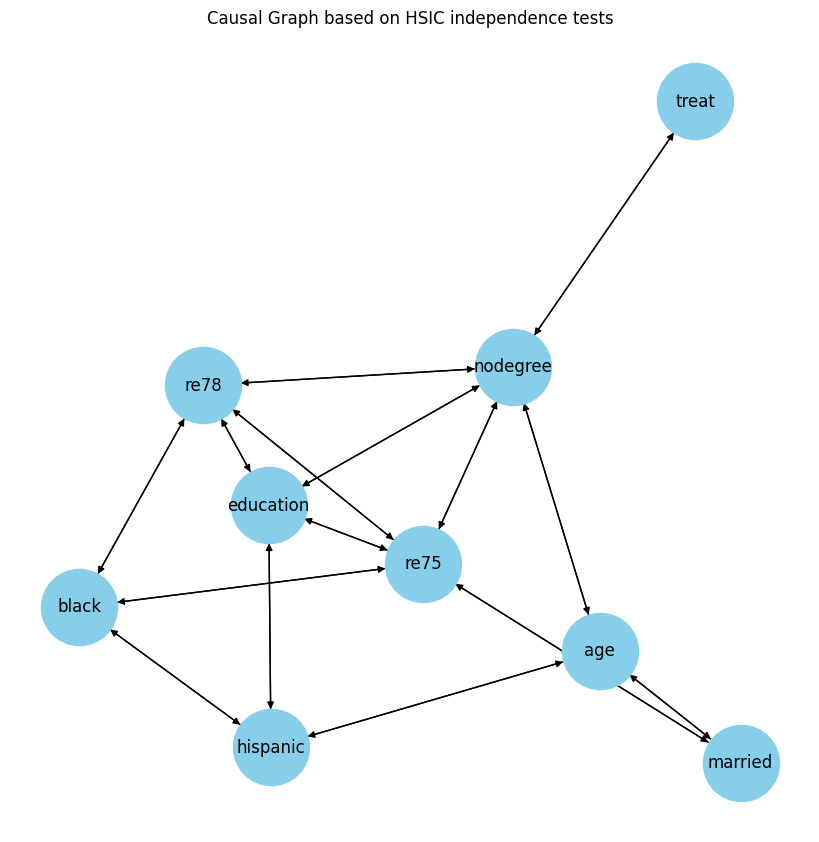

In [48]:
# construct a causal graph based on the results but first filter out confounders
edges = []
for (var1, var2), v in dependency_tests.items():
    if dependency_tests[var1, var2] <= alpha:
        edges.append((var1, var2))

print(edges)

# remove edges from confounders
for (var1, var2, cond), v in dependency_tests_cond.items():
    if (
        dependency_tests_cond[var1, var2, cond] >= alpha*10
        and (var1, var2) in edges
    ):
        edges.remove((var1, var2))


G = nx.DiGraph()
G.add_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue")
plt.title("Causal Graph based on HSIC independence tests")
plt.show()
